In [1]:
import pickle
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

In [2]:
pickle_in = open("ref_dict.pickle","rb")
ref_dict = pickle.load(pickle_in)

In [3]:
len(ref_dict)

10015

In [4]:
values = list(ref_dict.values())
names = list(ref_dict.keys())

In [5]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(values)

In [6]:
for i in range(len(names)):
    if not ref_dict[names[i]]==values[i]:
        print('error ', i)

In [7]:
ref = pd.read_csv("./main/train.csv")
ref = pd.concat([ref,pd.read_csv("./main/val.csv")],ignore_index=True)

In [10]:
ref[ref[ref.image=='ISIC_0024313']==1].index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [8]:
vals = []
for i in ref.image.tolist():
    vals.append(ref.loc[ref.image==i, ['MEL','NV','BCC','AKIEC','BKL','DF','VASC']].values.flatten().tolist().index(1))

In [9]:
len(vals)

10015

In [10]:
ref_df = pd.DataFrame({'name':ref.image.tolist(), 'gt':vals, 'kmean':kmeans.labels_.tolist()})

In [11]:
ref_df

,name,gt,kmean
0,ISIC_0024313,0,2
1,ISIC_0024315,0,2
2,ISIC_0024323,0,2
3,ISIC_0024333,0,3
4,ISIC_0024367,0,5
...,...,...,...
10010,ISIC_0032932,6,5
10011,ISIC_0033158,6,5
10012,ISIC_0033458,6,1
10013,ISIC_0033762,6,0


In [12]:
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sn
def _confusion_matrix(model_name, score, y_true, y_pred):
    cfs = confusion_matrix(y_true, y_pred)
    cfs.dtype = np.float
    for i in range(len(cfs)):
        cfs[i] = cfs[i]/sum(cfs[i])
    df_cm = pd.DataFrame(cfs, index = [0,1,2,3,4,5,6], columns = [0,1,2,3,4,5,6])
    plt.figure(figsize = (10,7))
    sns_plot = sn.heatmap(df_cm, annot=True, square=True, cmap="YlGnBu").set_title(f'Score: {score}')
    fig = sns_plot.get_figure()
#     fig.savefig(f"./confusion_matrix/{model_name}.png", dpi=400)

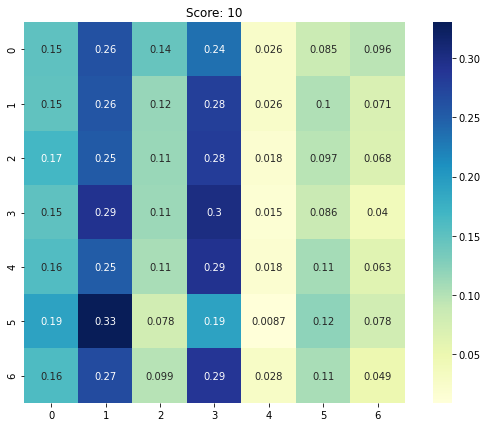

In [13]:
y_true = ref_df['gt'].tolist()
y_pred = ref_df['kmean'].tolist()
_confusion_matrix('asdf', 10, y_true, y_pred)

In [26]:
a = ref_df['gt']

In [27]:
a

0        0
1        0
2        0
3        0
4        0
        ..
10010    6
10011    6
10012    6
10013    6
10014    6
Name: gt, Length: 10015, dtype: int64